# 6.2 Exploring Relationships

##  This script contains the following points:

###  Import Libraries and Import Merged Data
###  Q3.  Create Correlation Heatmap
###  Q4.  Create Scatterplot
###  Q5.  Create a Pair Plot
###  Q6.  Create a Categorical Plot
###  Q7.  Revisit Project Questions
###  Q8.  Define Hypothesis

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Create Path
path = r'/Users/andrewruhnow/Documents/World Happiness Report 2015-2019'

In [3]:
path

'/Users/andrewruhnow/Documents/World Happiness Report 2015-2019'

In [4]:
# Import Merged Dataset
df_happiness = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Happiness_merged_all_years.pkl'))

In [5]:
print(df_happiness)

                      Country  Happiness Rank  Happiness Score  \
0                 Switzerland               1            7.587   
1                     Iceland               2            7.561   
2                     Denmark               3            7.527   
3                      Norway               4            7.522   
4                      Canada               5            7.427   
..                        ...             ...              ...   
777                    Rwanda             152            3.334   
778                  Tanzania             153            3.231   
779               Afghanistan             154            3.203   
780  Central African Republic             155            3.083   
781               South Sudan             156            2.853   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  1.34951                   0.94143  0.66557   
1                     1.30232  1.40223               

In [6]:
df_happiness.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year'],
      dtype='object')

In [7]:
df_happiness.head()

Country  Happiness Rank  Happiness Score  Economy (GDP per Capita)  \
0  Switzerland               1            7.587                   1.39651   
1      Iceland               2            7.561                   1.30232   
2      Denmark               3            7.527                   1.32548   
3       Norway               4            7.522                   1.45900   
4       Canada               5            7.427                   1.32629   

    Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0  1.34951                   0.94143  0.66557                        0.41978   
1  1.40223                   0.94784  0.62877                        0.14145   
2  1.36058                   0.87464  0.64938                        0.48357   
3  1.33095                   0.88521  0.66973                        0.36503   
4  1.32261                   0.90563  0.63297                        0.32957   

   Generosity  Year  
0     0.29678  2015  
1     0.43630  2015  
2     0.34139  2015  
3     0.34699  2015  
4     0.45811  2015

In [8]:
# Creating data subset and dropping unneeded columns
df_sub_happiness = df_happiness.drop(['Country', 'Year'], axis = 1)

In [9]:
df_sub_happiness.head()

Happiness Rank  Happiness Score  Economy (GDP per Capita)   Family  \
0               1            7.587                   1.39651  1.34951   
1               2            7.561                   1.30232  1.40223   
2               3            7.527                   1.32548  1.36058   
3               4            7.522                   1.45900  1.33095   
4               5            7.427                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  
0     0.29678  
1     0.43630  
2     0.34139  
3     0.34699  
4     0.45811

# Q3.  Create Correlation Matrix Heatmap

In [10]:
# Creating correlation table
df_sub_happiness.corr()

Happiness Rank  Happiness Score  \
Happiness Rank                       1.000000        -0.992066   
Happiness Score                     -0.992066         1.000000   
Economy (GDP per Capita)            -0.794791         0.789284   
Family                              -0.644842         0.648799   
Health (Life Expectancy)            -0.743655         0.742456   
Freedom                             -0.537942         0.551258   
Trust (Government Corruption)       -0.372781         0.398418   
Generosity                          -0.117713         0.137578   

                               Economy (GDP per Capita)    Family  \
Happiness Rank                                -0.794791 -0.644842   
Happiness Score                                0.789284  0.648799   
Economy (GDP per Capita)                       1.000000  0.585966   
Family                                         0.585966  1.000000   
Health (Life Expectancy)                       0.784338  0.572650   
Freedom                                        0.340511  0.420361   
Trust (Government Corruption)                  0.306307  0.126401   
Generosity                                    -0.014560 -0.037262   

                               Health (Life Expectancy)   Freedom  \
Happiness Rank                                -0.743655 -0.537942   
Happiness Score                                0.742456  0.551258   
Economy (GDP per Capita)                       0.784338  0.340511   
Family                                         0.572650  0.420361   
Health (Life Expectancy)                       1.000000  0.340745   
Freedom                                        0.340745  1.000000   
Trust (Government Corruption)                  0.250512  0.459593   
Generosity                                     0.010638  0.290706   

                               Trust (Government Corruption)  Generosity  
Happiness Rank                                     -0.372781   -0.117713  
Happiness Score                                     0.398418    0.137578  
Economy (GDP per Capita)                            0.306307   -0.014560  
Family                                              0.126401   -0.037262  
Health (Life Expectancy)                            0.250512    0.010638  
Freedom                                             0.459593    0.290706  
Trust (Government Corruption)                       1.000000    0.318920  
Generosity                                          0.318920    1.000000

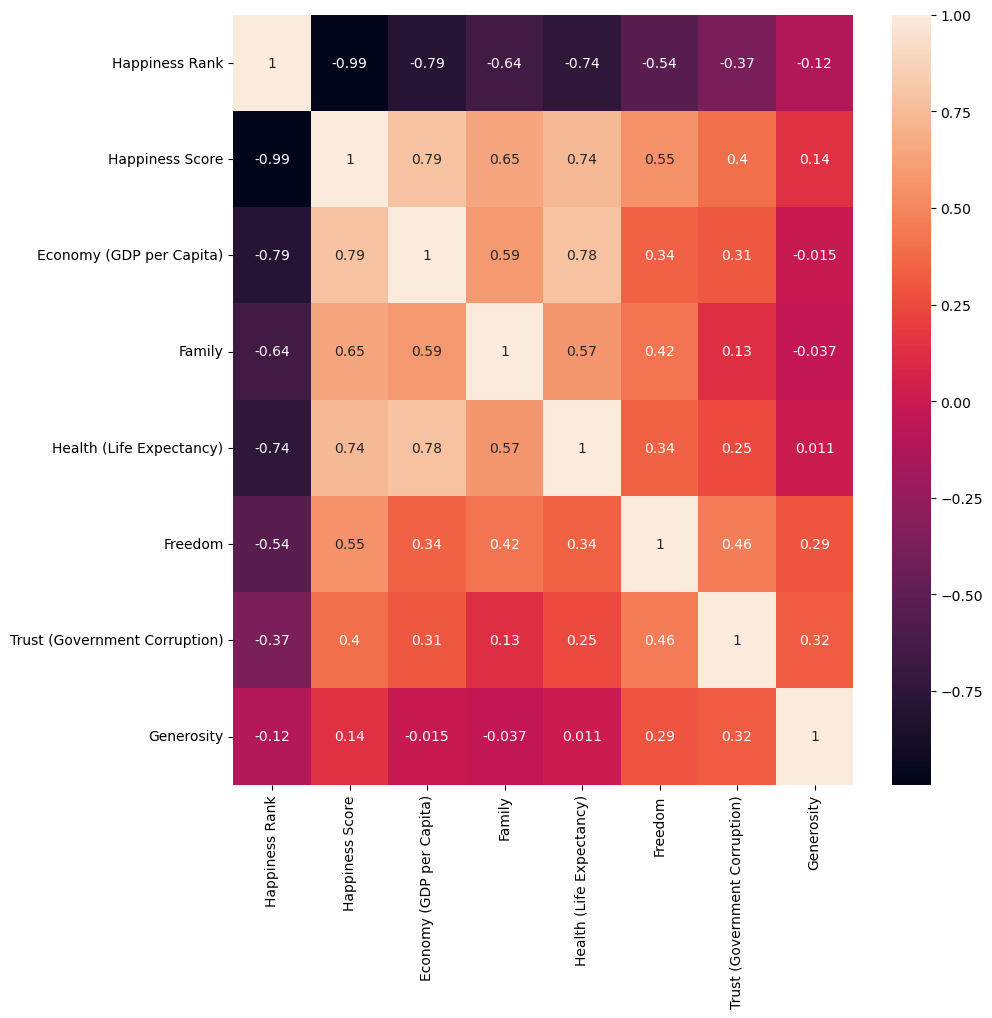

In [11]:
# Creating subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating Matrix Heatmap with Seaborn
corr = sns.heatmap(df_sub_happiness.corr(), annot = True, ax = ax)

In [31]:
# Exporting Heatmap to 04 visualization folder
corr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Heatmap_png'))

###  Q3 Answer:  Happiness Rank and Happiness Score have a near perfect negative relationship (-0.99).  This makes sense because when the Happiness Score variable is higher the Happiness Rank's variable is lower with a ranking of 1 is the happiest country.  Happiness Score has a strong positive correlation with Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom but has a weak relationship with Trust (Government Corruption) and Generosity.  Trust (Government Corruption) has a weak slight moderate relationship with the other variables but Generosity has a weak relationship across the board.

#  Q4.  Create a Scatterplot

/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


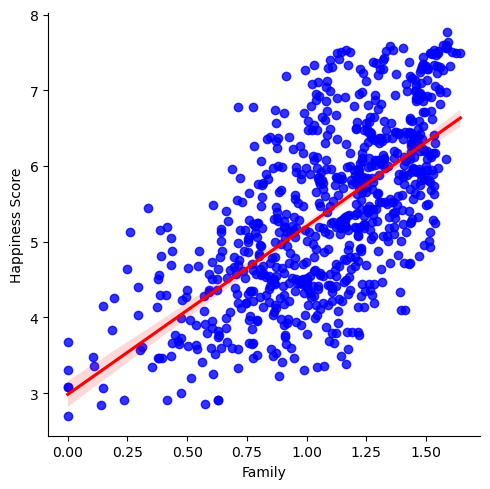

In [12]:
# Creating Family and Happiness Score scatterplot
sns.lmplot(x = 'Family', y = 'Happiness Score', data = df_sub_happiness, scatter_kws={'color': 'blue'}, line_kws = {'color': 'red'}) 

/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


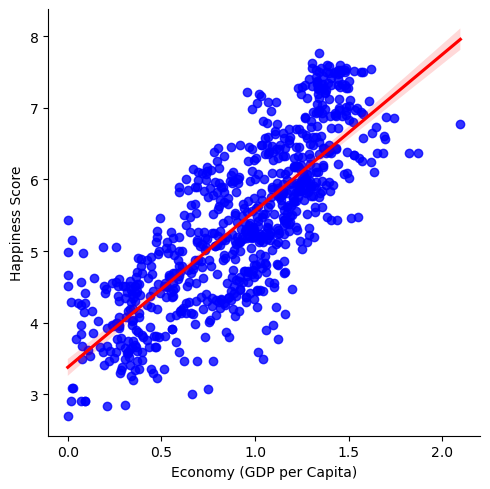

In [13]:
# Creating Economy (GDP per Capita) and Happiness Score scatterplot
sns.lmplot(x = 'Economy (GDP per Capita)', y = 'Happiness Score', data = df_sub_happiness, scatter_kws={'color': 'blue'}, line_kws = {'color': 'red'}) 

/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


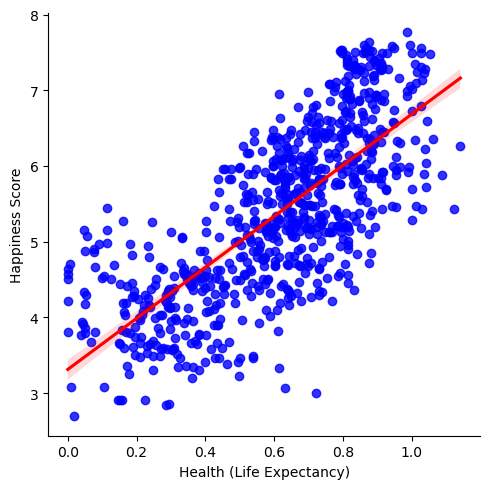

In [14]:
# Creating Health (Life expectancy) and Happiness Score Scatterplot
sns.lmplot(x = 'Health (Life Expectancy)', y = 'Happiness Score', data = df_sub_happiness, scatter_kws={'color': 'blue'}, line_kws = {'color': 'red'}) 

### Q4 Answer:  The scatterplots show strong correlations between Happiness Score and Family, Economy (GDP per Capita) and Health (Life Expectancy)

# Q5.  Create a Pair plot

/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

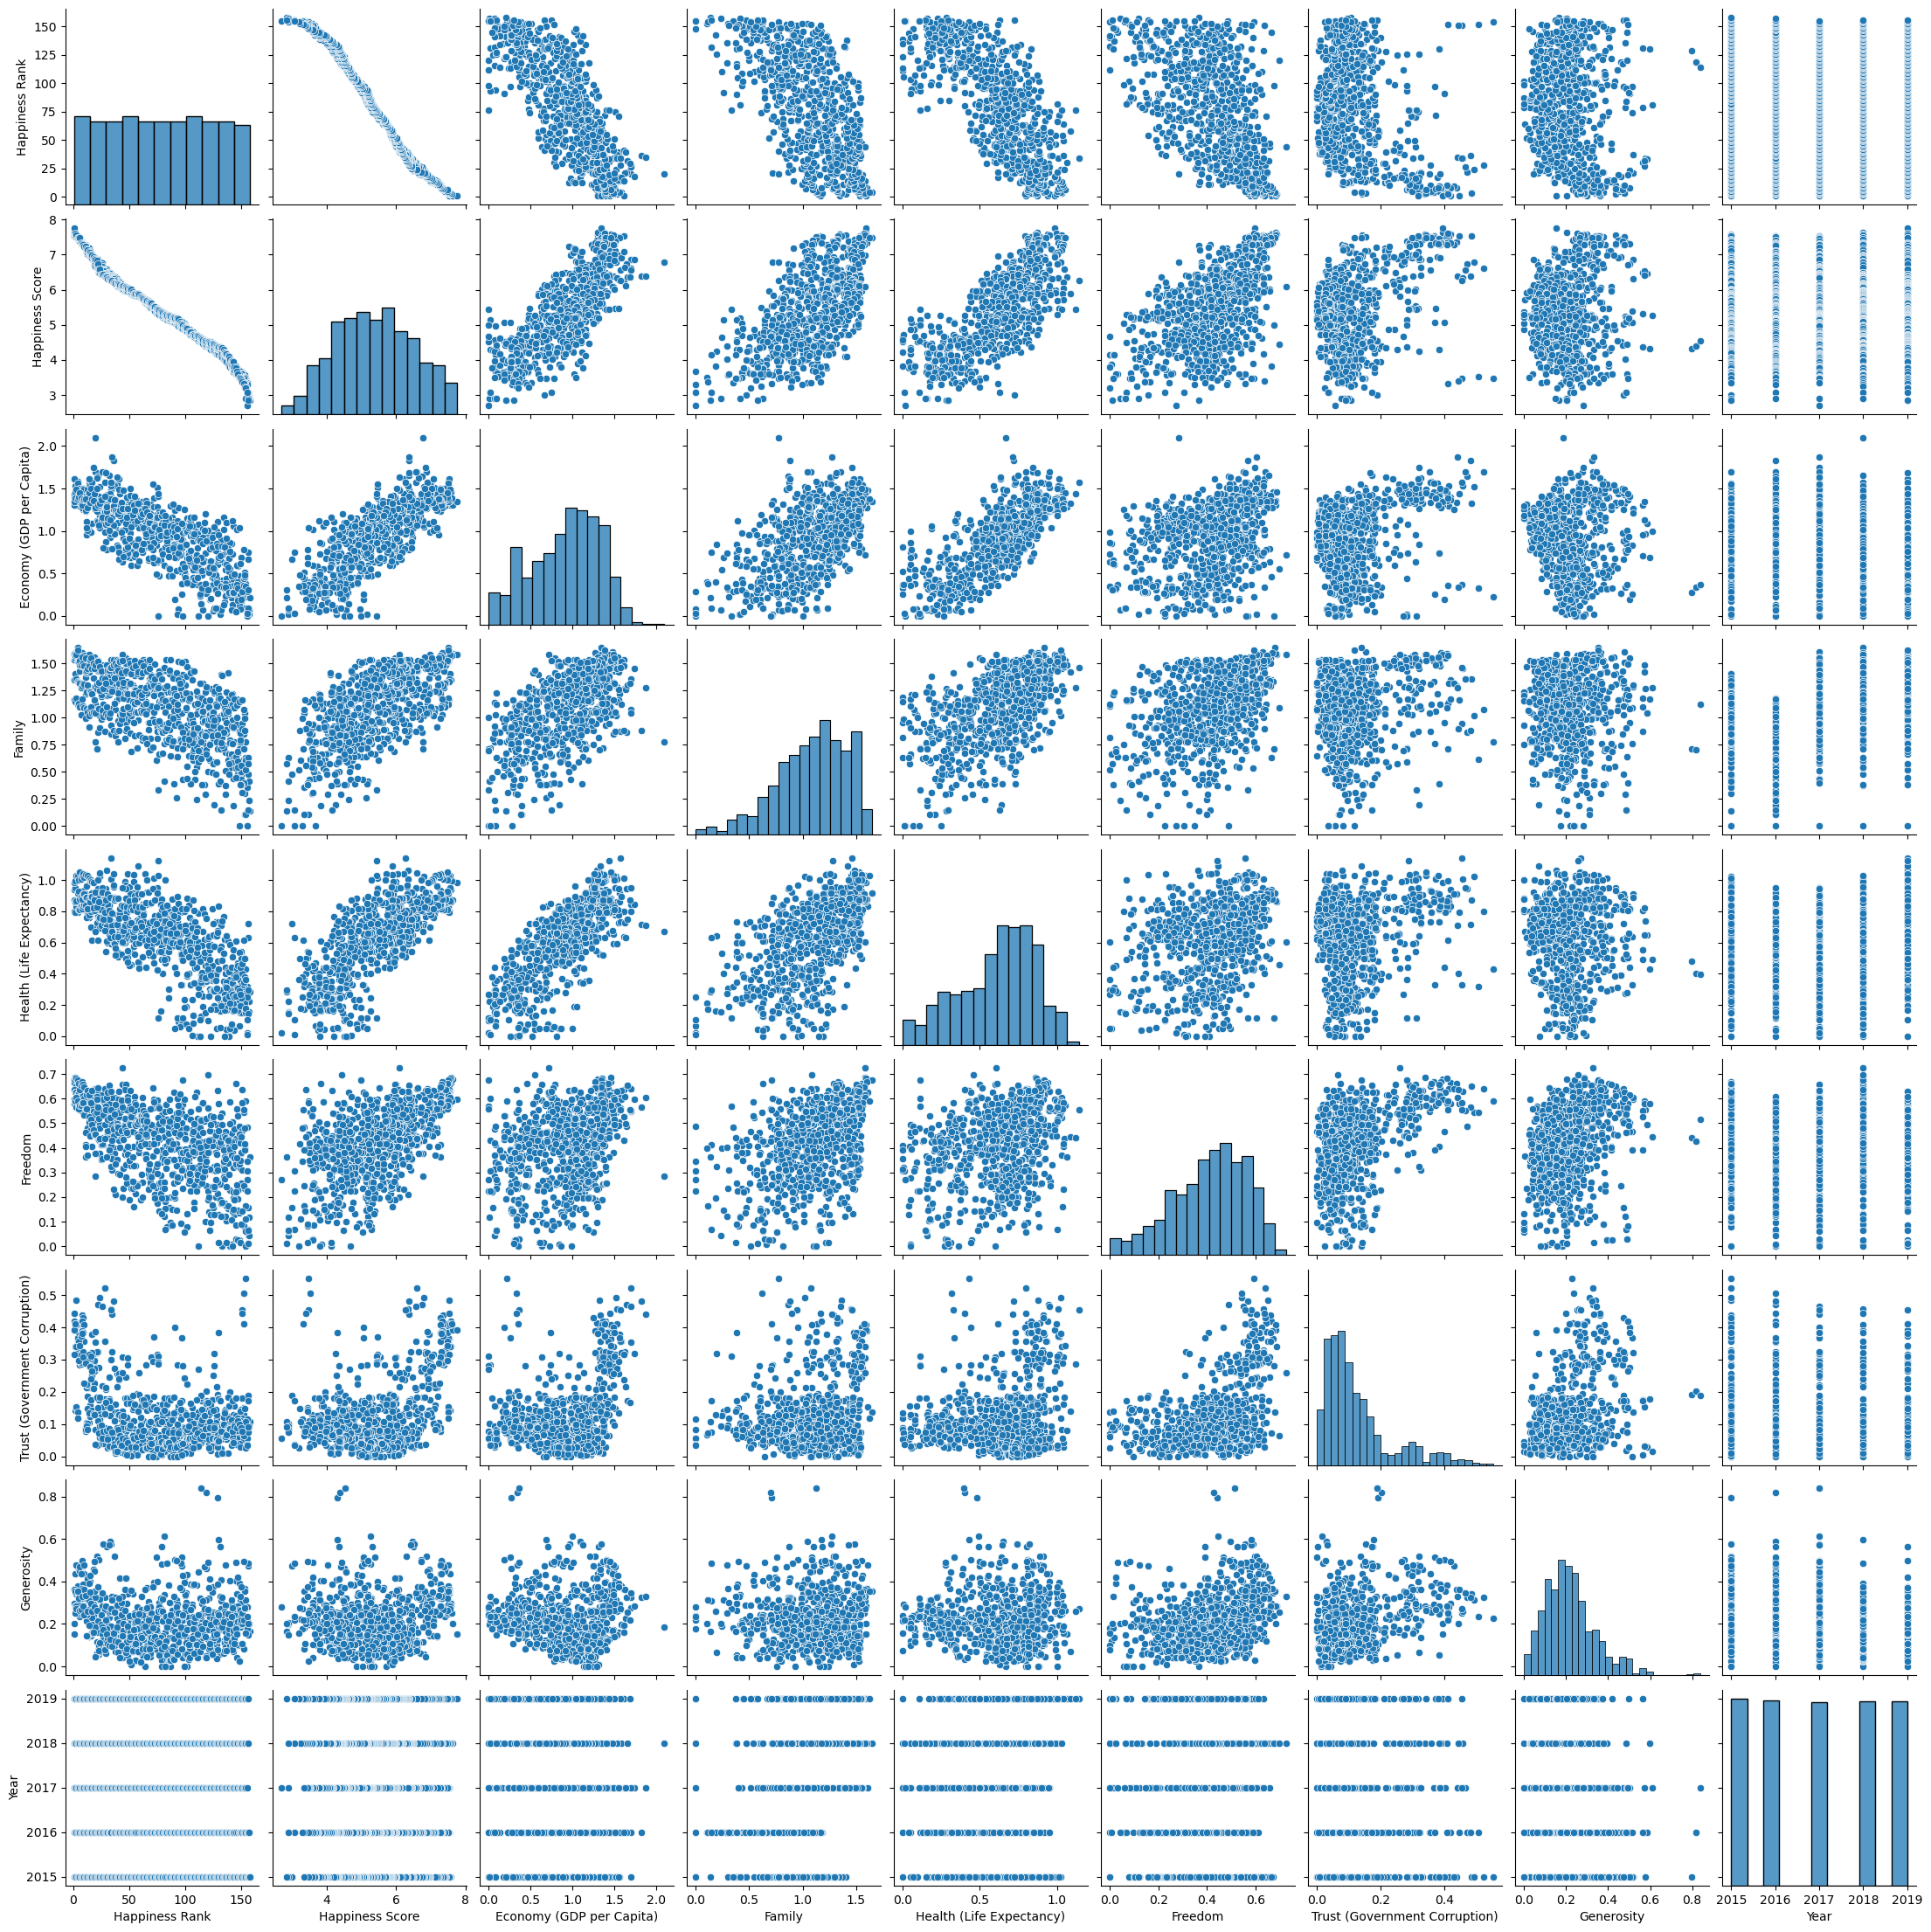

In [15]:
# Creating a Pair plot of entire data set
pair_plot = sns.pairplot(df_happiness)

In [16]:
# Creating subset of the strongest correlated variables only
df_sub_happy_strong = df_happiness.drop(['Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year', 'Country'], axis = 1)

In [17]:
df_sub_happy_strong.columns

Index(['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)'],
      dtype='object')

/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

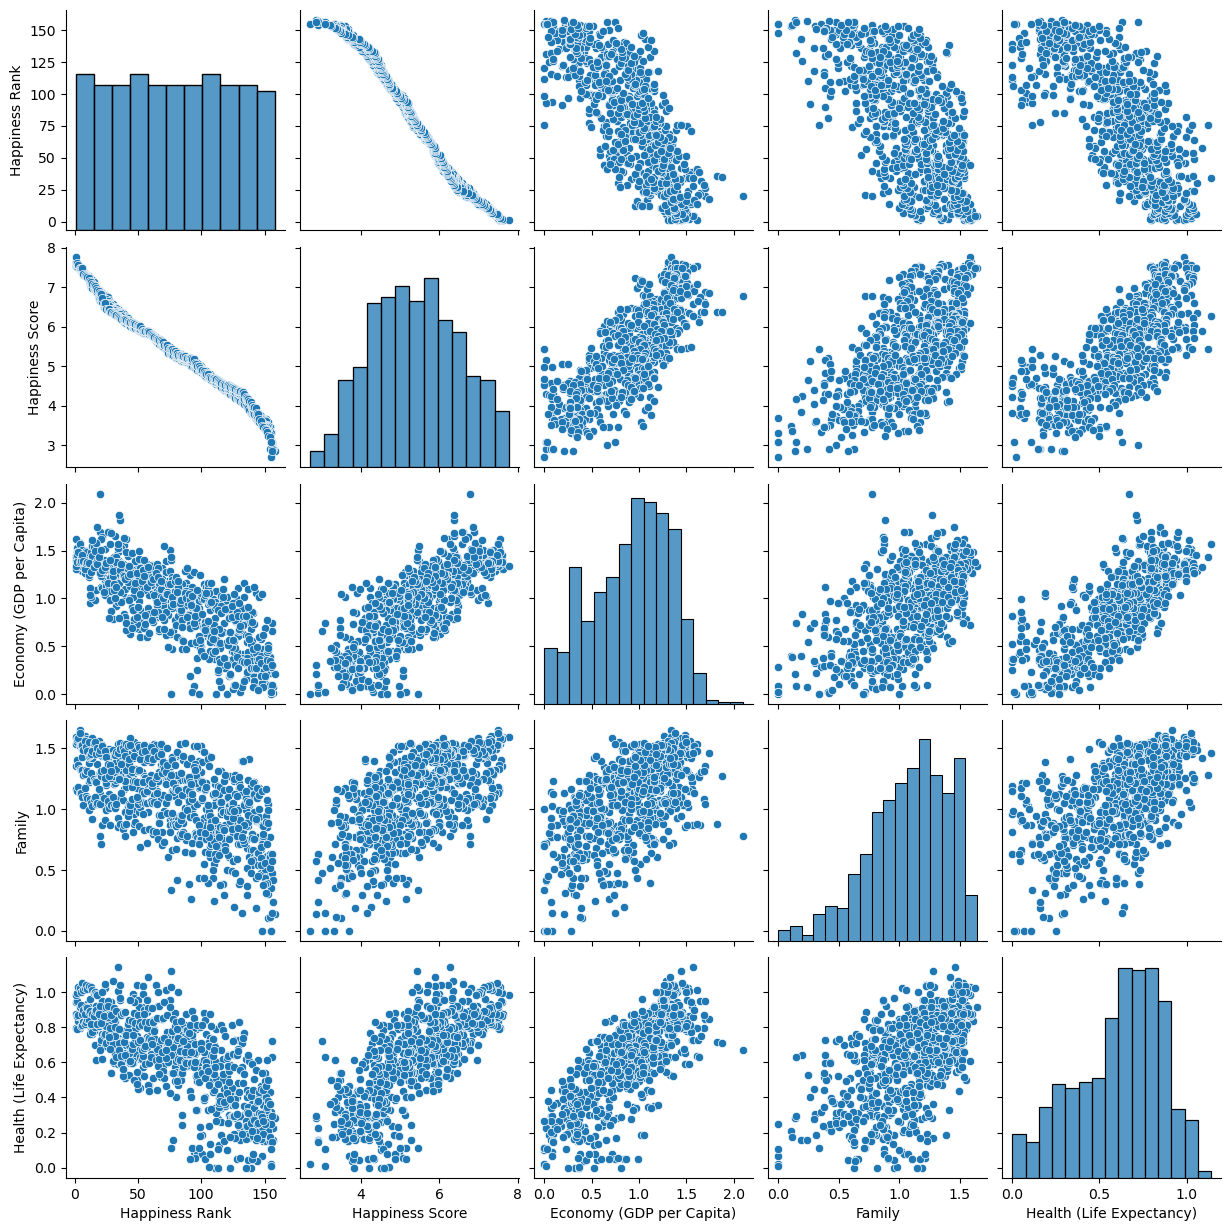

In [18]:
# Creating Pair plot of only strongest variables
pair_plot_strongest = sns.pairplot(df_sub_happy_strong)

In [19]:
# Creating subset of weakest variables only
df_sub_happy_weak = df_happiness.drop(['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Country', 'Year'], axis = 1)

In [20]:
df_sub_happy_weak.columns

Index(['Happiness Rank', 'Happiness Score', 'Freedom',
       'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

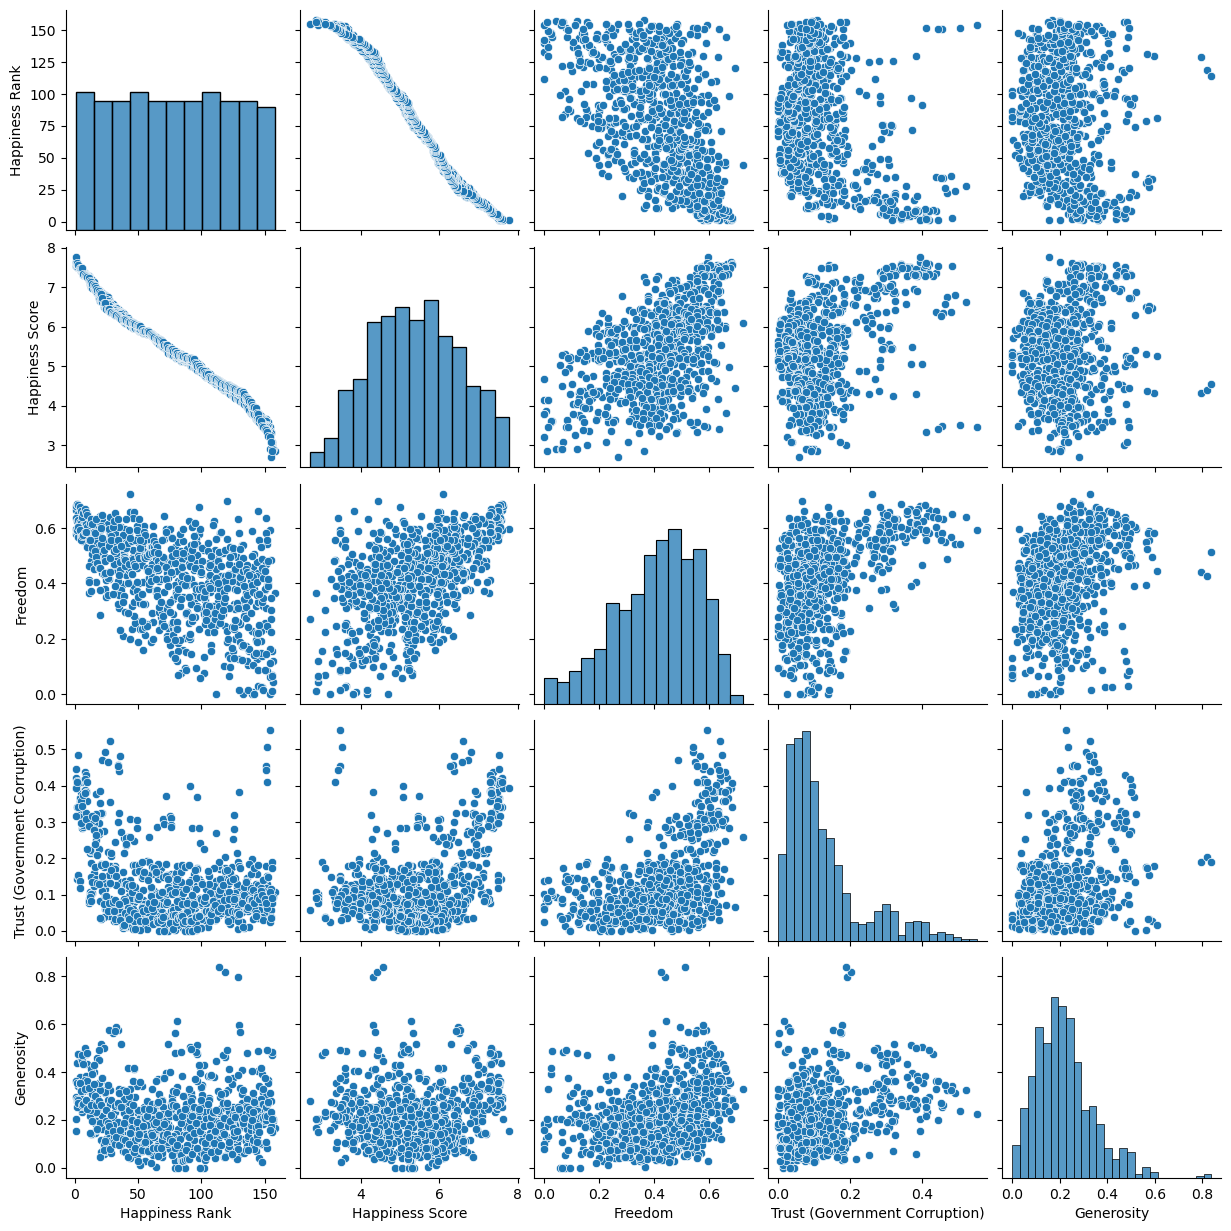

In [21]:
# Creating Pair plot of only weakest variables
pair_plot_weakest = sns.pairplot(df_sub_happy_weak)

###  Q5 Answer:  The strong pair plot with the strongest variables show strong correlation which I expected.  For the weakest pair plot I was surprised there there is a strong correlation between Freedom and Happiness Score and where the Heatmap shows a moderate relationship.  

#  Q6.  Create a Categorical plot

/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Happiness Score', ylabel='Count'>

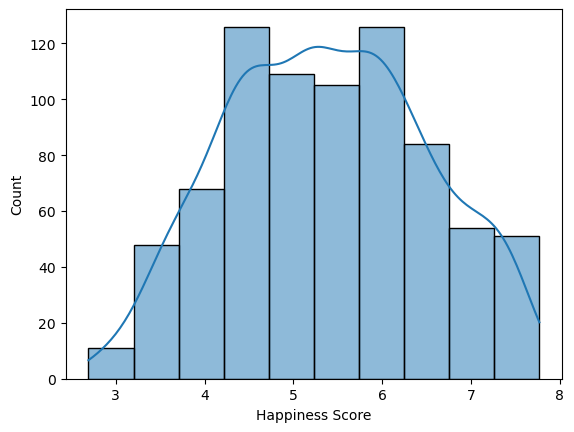

In [22]:
# Creating a histogram to see score distribution
sns.histplot(df_happiness['Happiness Score'], bins = 10, kde = True)

In [23]:
# Creating Happiness Score Category for categorical plot
df_happiness.loc[df_happiness['Happiness Score'] < 4, 'Happiness Score Category'] = 'Low Score'
df_happiness.loc[(df_happiness['Happiness Score'] >= 4) & (df_happiness['Happiness Score'] <6), 'Happiness Score Category'] = 'Middle Score'
df_happiness.loc[df_happiness['Happiness Score'] >= 6, 'Happiness Score Category'] = 'High Score'

In [24]:
df_happiness['Happiness Score Category'].value_counts(dropna = False)

Happiness Score Category
Middle Score    451
High Score      235
Low Score        96
Name: count, dtype: int64

/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


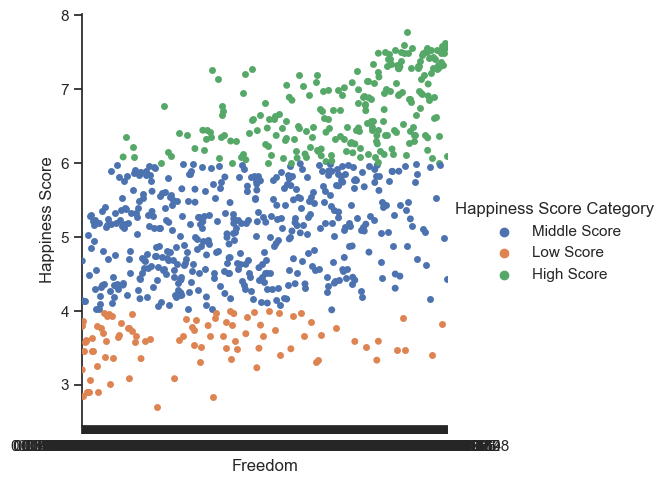

In [25]:
# Creating a Freedom categorical plot
sns.set(style="ticks")
cat_plot_freedom = sns.catplot(x='Freedom', y='Happiness Score', hue="Happiness Score Category", data=df_happiness)

/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


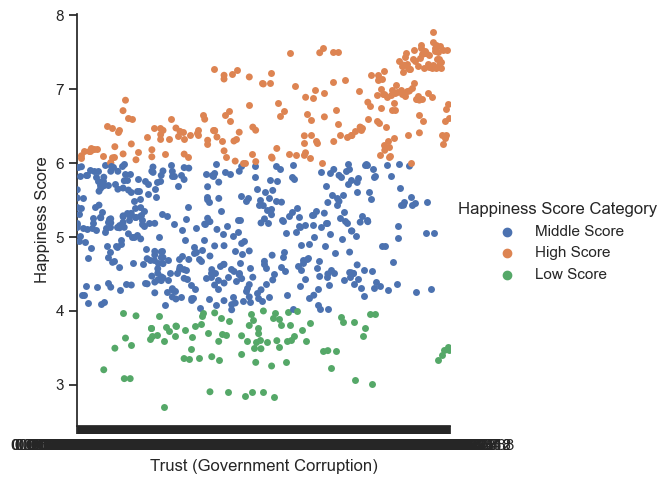

In [26]:
# Creating a Trust (Government Corruption) categorical plot
sns.set(style="ticks")
cat_plot_Gov_Corrupt = sns.catplot(x='Trust (Government Corruption)', y='Happiness Score', hue="Happiness Score Category", data=df_happiness)

/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


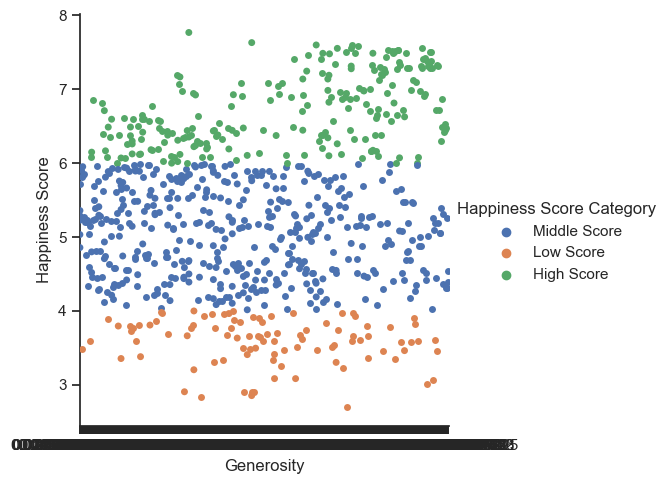

In [27]:
# Creating a Generosity categorical plot
sns.set(style="ticks")
cat_plot_Generosity = sns.catplot(x='Generosity', y='Happiness Score', hue="Happiness Score Category", data=df_happiness)

/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


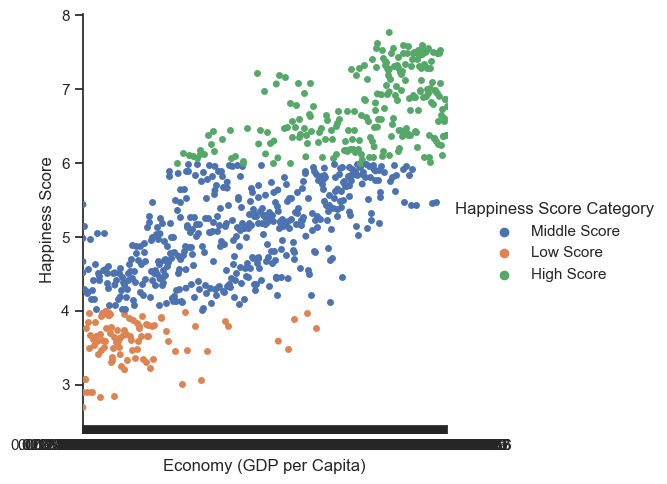

In [28]:
# Creating a Economy (GDP per Capita) categorical plot
sns.set(style="ticks")
cat_plot_Economy = sns.catplot(x='Economy (GDP per Capita)', y='Happiness Score', hue="Happiness Score Category", data=df_happiness)

/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


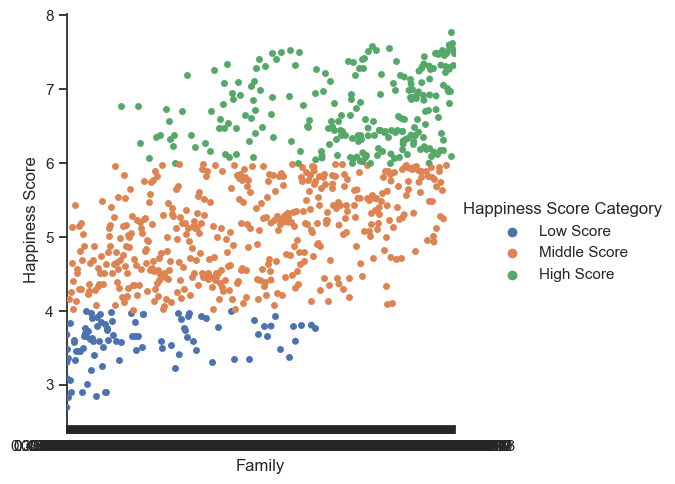

In [29]:
# Creating a Family categorical plot
sns.set(style="ticks")
cat_plot_family = sns.catplot(x='Family', y='Happiness Score', hue="Happiness Score Category", data=df_happiness)

/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


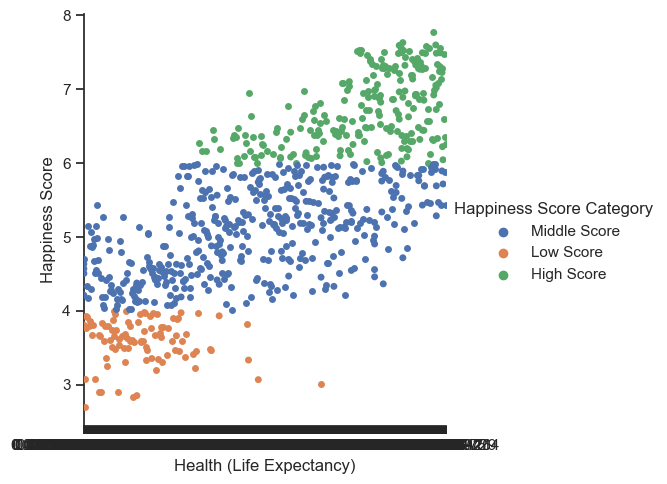

In [30]:
# Creating a Health (Life Expectancy) categorical plot
sns.set(style="ticks")
cat_plot_Health = sns.catplot(x='Health (Life Expectancy)', y='Happiness Score', hue="Happiness Score Category", data=df_happiness)

###  Q6 Answer:  I created categorical plots for variables Freedom, Trust (Government Corruption), Generosity, Economy (GDP per Capita), Family, and Health (Life Expectancy) but none of them show a line between the High, Middle, and Low Happiness Scores.  The plots basically show that majority of the variables fall in the middle score range compared to a High or Low score.  

# Q7.  Revisit Research Questions

### Q7 Answer:  I was able to see that Economy (GDP per capita), Family, and Health (Life Expectancy) had the greatest impact on a country's happiness score whereas freedom, government trust, and generosity had the least impact on a country's happiness score.  This observation answered 3 of my questions.  Which of the 6 variables impact the Happiness Score the most and the least?  To what extent do each of the 6 variables contribute to the Happiness Scores?  

###  I was also able to answer 3 more questions.  Is there a correlation between Trust (Government Corruption) and Happiness Score?  The Heatmap showed a moderate relationship and Pair plot showed a weak correlation between the two variables.  

###  Is there a correlation between Economy (GDP per Capita) and Health (Life Expectancy)?  The Heatmap showed a strong relationship and pair plot showed a strong positive correlation.  

###  Is there a correlation between Family (Social Support) and the Happiness Score?  The Heatmap showed a strong relationship and pair plot showed a strong positive correlation.

###  I was able to answer 6 out of 12 questions with this exercise.  I would like to focus more on the other questions which are more related to Countries and how the Happiness Rank/Scores changed or flucuated over the years.

# Q8.  Define Hypothesis

###  Q8 Answer:  Hypothesis - If a country has a high Economy (GDP per Capita), high Family Score, and a high Health (Life Expectancy) then a country will have a high Happiness Score.  Null Hypothesis - If a country has a high Economy (GDP per Capita), high Family Score, and a high Health (Life Expectancy) then a country will have a low Happiness Score.  

###  Hypothesis - The top 10 happiest countries happiness scores hasn't changed much over the years (2015-2019).  Null Hypothesis - The top 10 happiest countries happiness scores have varied greatly over the years (2015-2019).  

###  Hypothesis - The Top 10 least happiest countries happiness scores hasn't change much over the years (2015-2019). Null Hypothesis - The Tope 10 least happiest countries happiness scores have varied greatly over the years (2015-2019).